In [1]:
import torch 
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

In [2]:
# Create own dataset
n_pts = 500
# Nested list to create coordinates of our centers
#n_centers = [[-0.5, 0.5],[0.5, -0.5]]
X, y = datasets.make_circles(n_samples=n_pts, random_state=123, noise=0.1, factor=0.2)

#print("X values: \n")
#print(X)
#print("y value: \n")
#print(y)

#X and y are numpy arrays
#Neural networks only train data when data is in tensor
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(500, 1)) # reshape data into 100 rows, 1 column


In [3]:
#Plot graph of dataset
def scatter_plot():
    plt.scatter(X[y==0, 0], X[y==0, 1])
    plt.scatter(X[y==1, 0], X[y==1, 1]) #X and y are numpy arrays

In [4]:
#Perceptron Model Setup
class Model(nn.Module): # using torch.nn module
    def __init__(self, input_size, H1, output_size): # Perceptron need input and output side
        super().__init__()
        self.linear = nn.Linear(input_size, H1)
        self.linear2 = nn.Linear(H1, output_size)
    
    def forward(self, X):
        x = torch.sigmoid(self.linear(X))
        x = torch.sigmoid(self.linear2(x))
        return x
    
    def predict(self, X):
        pred = self.forward(X)
        if pred >= 0.5:
            return 1
        else:
            return 0
        
# Initialize a linear model
torch.manual_seed(2) #set up fixed
#torch.manual_seed(random.randint(0, 10))
model = Model(2, 4, 1)
# Display model weight, bias and parameters
print(list(model.parameters()))
# Result
#tensor([[ 0.1622, -0.1683]], requires_grad=True), -> w1 = .1622; w2 = -.1683
#Parameter containing:
#tensor([0.1939], requires_grad=True)] bias = 0.1939

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


In [5]:
# Continue - Model Training (09092020)
# Concept: use binary cross entropy loss to make model fit our data

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [6]:
# Iterate model through n number of epochs
epochs = 1000
losses = []
for i in range(epochs):
    y_pred = model.forward(x_data)
    loss = criterion(y_pred, y_data)
    print("epoch: ", i, "loss: ", loss.item())
    
    
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step() # all optimizers use step method for optimization

epoch:  0 loss:  0.7148522138595581
epoch:  1 loss:  0.6947318911552429
epoch:  2 loss:  0.6955163478851318
epoch:  3 loss:  0.7014891505241394
epoch:  4 loss:  0.7013983130455017
epoch:  5 loss:  0.6974702477455139
epoch:  6 loss:  0.693925678730011
epoch:  7 loss:  0.6928598284721375
epoch:  8 loss:  0.6939383149147034
epoch:  9 loss:  0.695438802242279
epoch:  10 loss:  0.6958754062652588
epoch:  11 loss:  0.6949177980422974
epoch:  12 loss:  0.6931490898132324
epoch:  13 loss:  0.6913898587226868
epoch:  14 loss:  0.6901612877845764
epoch:  15 loss:  0.6894590854644775
epoch:  16 loss:  0.6888433694839478
epoch:  17 loss:  0.6877668499946594
epoch:  18 loss:  0.6859008073806763
epoch:  19 loss:  0.6832481622695923
epoch:  20 loss:  0.6800421476364136
epoch:  21 loss:  0.6765590310096741
epoch:  22 loss:  0.6729680895805359
epoch:  23 loss:  0.6692698001861572
epoch:  24 loss:  0.6653285622596741
epoch:  25 loss:  0.6609664559364319
epoch:  26 loss:  0.6560585498809814
epoch:  27 lo

epoch:  213 loss:  0.015624627470970154
epoch:  214 loss:  0.01551863458007574
epoch:  215 loss:  0.015413940884172916
epoch:  216 loss:  0.015310516580939293
epoch:  217 loss:  0.015208332799375057
epoch:  218 loss:  0.015107370913028717
epoch:  219 loss:  0.015007615089416504
epoch:  220 loss:  0.01490902528166771
epoch:  221 loss:  0.014811593107879162
epoch:  222 loss:  0.014715295284986496
epoch:  223 loss:  0.014620118774473667
epoch:  224 loss:  0.014526030980050564
epoch:  225 loss:  0.014433024451136589
epoch:  226 loss:  0.014341066591441631
epoch:  227 loss:  0.014250154606997967
epoch:  228 loss:  0.014160257764160633
epoch:  229 loss:  0.014071359299123287
epoch:  230 loss:  0.013983448967337608
epoch:  231 loss:  0.013896511867642403
epoch:  232 loss:  0.01381052564829588
epoch:  233 loss:  0.013725470751523972
epoch:  234 loss:  0.013641336932778358
epoch:  235 loss:  0.013558108359575272
epoch:  236 loss:  0.013475770130753517
epoch:  237 loss:  0.013394313864409924
epo

epoch:  418 loss:  0.0058956025168299675
epoch:  419 loss:  0.005874567665159702
epoch:  420 loss:  0.005853652488440275
epoch:  421 loss:  0.0058328574523329735
epoch:  422 loss:  0.005812176037579775
epoch:  423 loss:  0.005791611969470978
epoch:  424 loss:  0.005771160125732422
epoch:  425 loss:  0.005750830750912428
epoch:  426 loss:  0.005730608012527227
epoch:  427 loss:  0.0057105012238025665
epoch:  428 loss:  0.005690510850399733
epoch:  429 loss:  0.005670628044754267
epoch:  430 loss:  0.005650852806866169
epoch:  431 loss:  0.005631188862025738
epoch:  432 loss:  0.005611637607216835
epoch:  433 loss:  0.00559219578281045
epoch:  434 loss:  0.005572859197854996
epoch:  435 loss:  0.00555363018065691
epoch:  436 loss:  0.005534505005925894
epoch:  437 loss:  0.005515489727258682
epoch:  438 loss:  0.005496579688042402
epoch:  439 loss:  0.005477770697325468
epoch:  440 loss:  0.005459065083414316
epoch:  441 loss:  0.005440464708954096
epoch:  442 loss:  0.005421963054686785

epoch:  621 loss:  0.0032577994279563427
epoch:  622 loss:  0.003250050125643611
epoch:  623 loss:  0.0032423308584839106
epoch:  624 loss:  0.0032346430234611034
epoch:  625 loss:  0.0032269852235913277
epoch:  626 loss:  0.0032193618826568127
epoch:  627 loss:  0.003211765317246318
epoch:  628 loss:  0.003204205073416233
epoch:  629 loss:  0.0031966730020940304
epoch:  630 loss:  0.0031891705002635717
epoch:  631 loss:  0.0031817001290619373
epoch:  632 loss:  0.0031742530409246683
epoch:  633 loss:  0.0031668406445533037
epoch:  634 loss:  0.003159458050504327
epoch:  635 loss:  0.0031521040946245193
epoch:  636 loss:  0.003144780406728387
epoch:  637 loss:  0.00313748512417078
epoch:  638 loss:  0.0031302215065807104
epoch:  639 loss:  0.0031229816377162933
epoch:  640 loss:  0.0031157752964645624
epoch:  641 loss:  0.0031085952650755644
epoch:  642 loss:  0.0031014415435492992
epoch:  643 loss:  0.0030943213496357203
epoch:  644 loss:  0.0030872246716171503
epoch:  645 loss:  0.00

epoch:  822 loss:  0.002152822446078062
epoch:  823 loss:  0.0021489348728209734
epoch:  824 loss:  0.0021450615022331476
epoch:  825 loss:  0.0021411951165646315
epoch:  826 loss:  0.0021373445633798838
epoch:  827 loss:  0.002133504254743457
epoch:  828 loss:  0.002129671862348914
epoch:  829 loss:  0.002125854603946209
epoch:  830 loss:  0.0021220475900918245
epoch:  831 loss:  0.0021182491909712553
epoch:  832 loss:  0.0021144633647054434
epoch:  833 loss:  0.0021106908097863197
epoch:  834 loss:  0.0021069261711090803
epoch:  835 loss:  0.002103169448673725
epoch:  836 loss:  0.002099425531923771
epoch:  837 loss:  0.002095697680488229
epoch:  838 loss:  0.0020919733215123415
epoch:  839 loss:  0.002088264562189579
epoch:  840 loss:  0.0020845606923103333
epoch:  841 loss:  0.002080874051898718
epoch:  842 loss:  0.0020771927665919065
epoch:  843 loss:  0.002073523122817278
epoch:  844 loss:  0.0020698627922683954
epoch:  845 loss:  0.0020662155002355576
epoch:  846 loss:  0.00206

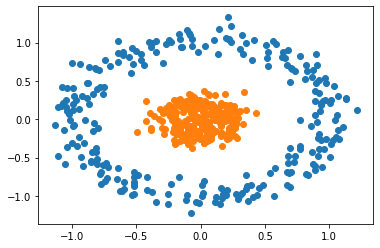

In [7]:
scatter_plot()

Text(0.5, 0, 'epoch')

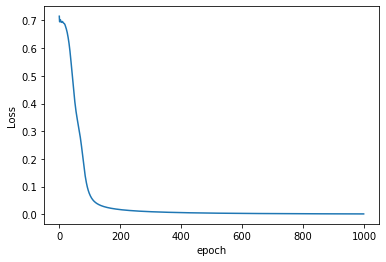

In [8]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

In [9]:
# Model Testing
# Test our model by running test using unlabeled data
"""
point1 = torch.Tensor([1.0, -1.0])
point2 = torch.Tensor([-1.0, 1.0])
plt.plot(point1.numpy()[0], point1.numpy()[1], 'ro')
plt.plot(point2.numpy()[0], point2.numpy()[1], 'ko')


print("Red point positive probability = {}".format(model.forward(point1).item()))
print("Black point positive probability = {}".format(model.forward(point2).item()))

print("Red point in class = {}".format(model.predict(point1)))
print("Black point in class = {}".format(model.predict(point2)))
"""

#plot_fit("Trained Model")

'\npoint1 = torch.Tensor([1.0, -1.0])\npoint2 = torch.Tensor([-1.0, 1.0])\nplt.plot(point1.numpy()[0], point1.numpy()[1], \'ro\')\nplt.plot(point2.numpy()[0], point2.numpy()[1], \'ko\')\n\n\nprint("Red point positive probability = {}".format(model.forward(point1).item()))\nprint("Black point positive probability = {}".format(model.forward(point2).item()))\n\nprint("Red point in class = {}".format(model.predict(point1)))\nprint("Black point in class = {}".format(model.predict(point2)))\n'

In [28]:
#Testing our DNN (09152020)

def plot_decision_boundary(X, y):
    x_span = np.linspace(min(X[:, 0]) -0.25, max(X[:, 0]) +0.25) # -1 = adding tolerance to min and max values
    y_span = np.linspace(min(X[:, 1]) -0.25, max(X[:, 0]) +0.25)
    # Make it 3-dimensional
#    x_span = np.linspace(min(X[:, 0]), max(X[:, 0]), 3)
#    y_span = np.linspace(min(X[:, 1]), max(X[:, 0]), 3)
    # Define two square 2-dimensional array obtained from numpy function
    xx, yy = np.meshgrid(x_span, y_span)
    # Convert n-dimensional arrays into 1-dimensional
    xx.ravel(), yy.ravel()
    # Making Cartesian plane (grid)
    grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
    pred_func = model.forward(grid)
    # Reshape array 
    z = pred_func.view(xx.shape).detach().numpy()
    # Create a contour plot of predicted results
    plt.contourf(xx, yy, z)
    
#    print(x_span, "\n") #obtain array with 50 equally spaced points from min horizontal coordinates to maximum
#    print(xx, "\n")
#    print(yy, "\n")
    


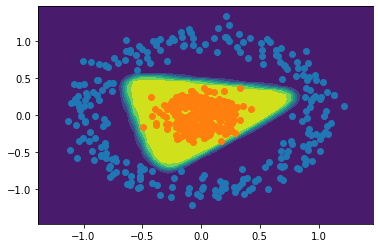

In [29]:
plot_decision_boundary(X, y)
scatter_plot()

Prediction is 1


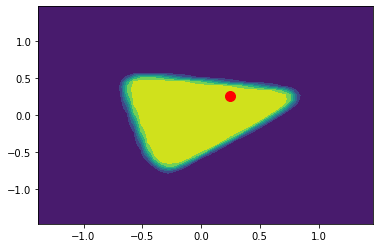

In [34]:
x = 0.25
y = 0.25
point = torch.Tensor([x, y])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color='red')
print('Prediction is', prediction)
plot_decision_boundary(X,y)

# So far, only dealt with binary datasets